In [1]:
with open("knowledge_graph/FB15k-237/raw/train.txt") as f:
    train_lines = f.readlines()
    # print(lines[0])
with open("knowledge_graph/FB15k-237/raw/valid.txt") as f:
    val_lines = f.readlines()
    # print(lines[0])
with open("knowledge_graph/FB15k-237/raw/test.txt") as f:
    test_lines = f.readlines()
    # print(lines[0])
len(test_lines) + len(val_lines) + len(train_lines)

310116

For a given edges in valid set. It takes how many step to go from head to tail or vice versa ?


In [2]:
from collections import defaultdict
adj_list = defaultdict(list)
for line in train_lines + val_lines:
    h, r, t = line.strip().split("\t")
    adj_list[h].append(t)
    adj_list[t].append(h)

In [3]:
def bfs(start, goal, adj_list):
    if start == goal:
        return 0
    if start not in adj_list or goal not in adj_list:
        return -1 # Nodes not in graph

    queue = [(start, 0)]  # (node, distance)
    visited = {start}

    while queue:
        current_node, distance = queue.pop(0)

        for neighbor in adj_list.get(current_node, []):
            if neighbor == goal:
                return distance + 1
            if neighbor not in visited:
                visited.add(neighbor)
                queue.append((neighbor, distance + 1))
    
    return -1 # Goal not reachable

In [4]:
distribution = defaultdict(int)
for i, edge in enumerate(test_lines):
    head, relation, tail = edge.strip().split("\t")
    res = bfs(head, tail, adj_list)
    distribution[res] += 1
    if (i + 1) % 100 == 0:
        print(f"Processed {i+1} edges")

Processed 100 edges
Processed 200 edges
Processed 300 edges
Processed 400 edges
Processed 500 edges
Processed 600 edges
Processed 700 edges
Processed 800 edges
Processed 900 edges
Processed 1000 edges
Processed 1100 edges
Processed 1200 edges
Processed 1300 edges
Processed 1400 edges
Processed 1500 edges
Processed 1600 edges
Processed 1700 edges
Processed 1800 edges
Processed 1900 edges
Processed 2000 edges
Processed 2100 edges
Processed 2200 edges
Processed 2300 edges
Processed 2400 edges
Processed 2500 edges
Processed 2600 edges
Processed 2700 edges
Processed 2800 edges
Processed 2900 edges
Processed 3000 edges
Processed 3100 edges
Processed 3200 edges
Processed 3300 edges
Processed 3400 edges
Processed 3500 edges
Processed 3600 edges
Processed 3700 edges
Processed 3800 edges
Processed 3900 edges
Processed 4000 edges
Processed 4100 edges
Processed 4200 edges
Processed 4300 edges
Processed 4400 edges
Processed 4500 edges
Processed 4600 edges
Processed 4700 edges
Processed 4800 edges
P

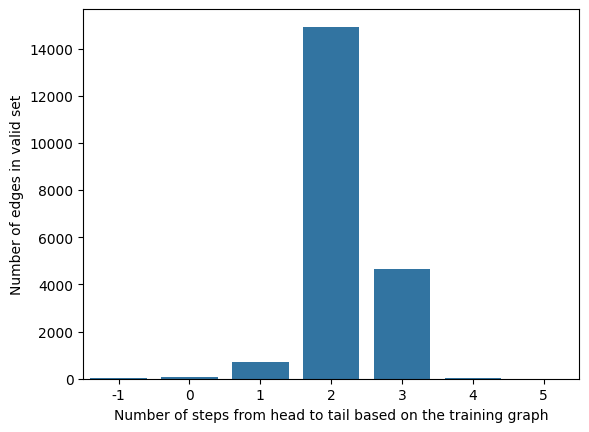

In [5]:
from seaborn import barplot
import matplotlib.pyplot as plt
barplot(x=list(distribution.keys()), y=list(distribution.values()))
plt.xlabel("Number of steps from head to tail based on the training graph")
plt.ylabel("Number of edges in valid set");

In [30]:
distribution.keys()

dict_keys([2, 3, 0, 4, -1, 5])

In [28]:
len(val_lines)

17535